## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [2]:
#Compute mean values and variance for each feature
df.mean()

#Compute variance for each feature
df.var()

#print mean and variance for each feature
for col in df.columns:
    print("{}: mean={}, var={}".format(col,df[col].mean(),df[col].var()))
    

AGE: mean=48.51809954751131, var=171.84661043904742
SEX: mean=1.4683257918552035, var=0.2495613630067412
BMI: mean=26.37579185520362, var=19.519798124377957
BP: mean=94.64701357466062, var=191.30440103836406
S1: mean=189.14027149321268, var=1197.7172407424507
S2: mean=115.43914027149322, var=924.9554940437713
S3: mean=49.78846153846154, var=167.2935853828711
S4: mean=4.070248868778281, var=1.6652609356563137
S5: mean=4.641410859728507, var=0.2728918982944973
S6: mean=91.26018099547511, var=132.16571243882169
Y: mean=152.13348416289594, var=5943.331347923785


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

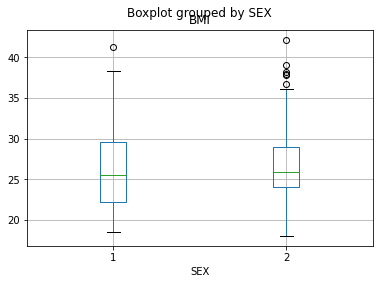

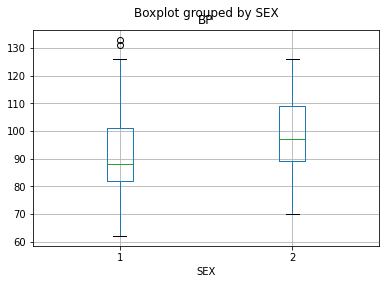

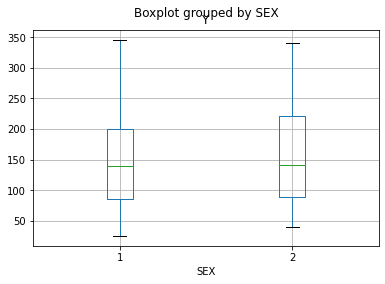

In [3]:
#Loop through each feature and compute mean and variance
for cols in ['BMI', 'BP', 'Y']:
    df.boxplot(column=cols,by='SEX')
    

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

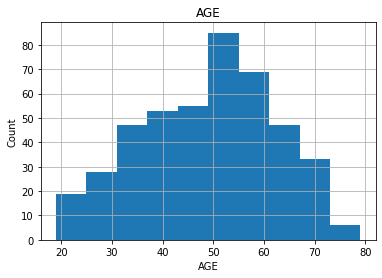

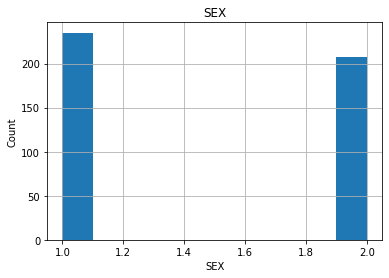

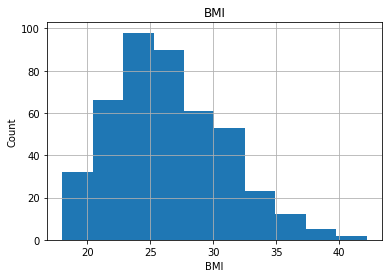

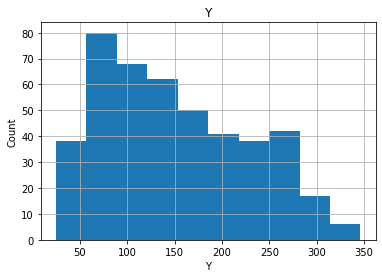

In [4]:
#Distribution of Age
import matplotlib.pyplot as plt 

#Histogram
for cols in ['AGE', 'SEX', 'BMI', 'Y']:
    df.hist(column=cols)
    plt.xlabel(cols) # add x-axis label
    plt.ylabel('Count') # add y-axis label
    plt.show()

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [5]:
df.corr()
# 

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


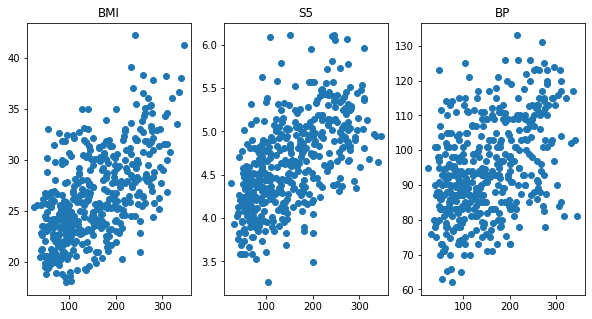

In [6]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i,n in enumerate(['BMI','S5','BP']):
    ax[i].scatter(df['Y'],df[n])
    ax[i].set_title(n)
plt.show()

### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [7]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975
